In [90]:
%run ./code.ipynb #or another path to the file with the main code


What do we mean by false positive or false negative errors in this work?


**False positive error** - if true mean of experimental data is equal mean of control data, but we reject the hypothesis of equality of means with a significance level of 0.05


**False negative error** - if the true values of the mean of the experiment and control are different, but we do not reject the hypothesis of equality of the means with a significance level of 0.05

In [91]:
#Your experimental data
#Example:
data_exp =  np.array([
    [0.7,0.8,0.6,0.5,1], #1st claster
    [1.1,0.9,0.8,0.8,0.9], #2nd claster
    [0.7,0.6,0.8,0.9,0.7] #3rd claster
])

In [92]:
#control or comparing data
#Example:
data_control = np.array([
    [1,1,1.5,0.5,1], #1st claster
    [1.1,1.2,0.8,1.3,1.0], #2nd claster
    [0.8,0.9,1,0.7,0.8] #3rd claster
])

Mean experimetal =  0.787
Mean control =  0.973
inter cluster SD = 0.099
intra cluster SD = 0.147


p value adjusted =  0.169


If your mean and SD are true: 
Probability of false negative error is 0.686
If there are  4  clusters, the false negative error will be 0.477
If there are  5  clusters, the false negative error will be 0.378
If there are  6  clusters, the false negative error will be 0.282
If there are  7  clusters, the false negative error will be 0.214
If there are  8  clusters, the false negative error will be 0.133


If your SD are true and 
 mean_exp = mean_control = (mean_exp+ mean_control)/2 =  0.88
Probability of false positive error is 0.026


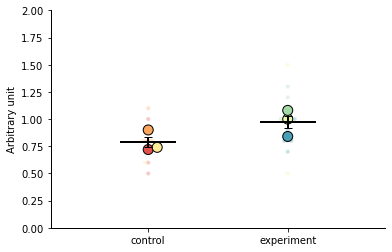

In [93]:
#Analyze data
analyze(data_exp, data_control, forecast_error=True)

Let's conduct an experiment that every experimentator wish of. We will do it dry, quick and we will know the real values of measurements. This might show us the difficulties and danger moments in result interpretation.
Imagine that we have to test a drug. For this we should carry out several experiments both for drug and control. This time we'll have 3 days of experiments and 10 measurements per day. With our code we can see the real values of measurements for control and drug (here it's called exp and conduct an experiment. For the sake of generality in our code the days are called clusters and 'drug' is exp(experiment).

##  1. Simply generate data and display it

We can set true values of 'drug' and 'control' different and see how experimental data look like. Does it look similar to data that you get in your laboratory?

Mean experimetal =  0.9
Mean control =  1.012
inter cluster SD = 0.048
intra cluster SD = 0.278


p value adjusted =  0.176


If your mean and SD are true: 
Probability of false negative error is 0.76


If your SD are true and 
 mean_exp = mean_control = (mean_exp+ mean_control)/2 =  0.956
Probability of false positive error is 0.058


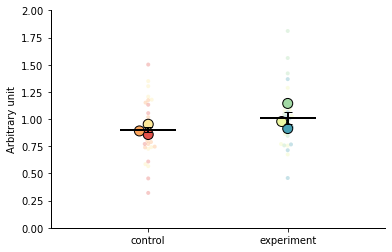

In [94]:
data_exp = generate_data(true_value=0.8, inter_cluster_SD=0.03, intra_cluster_SD=0.3, \
                             N_clusters=3, N_per_cluster=10)
data_control = generate_data(true_value=1, inter_cluster_SD=0.03, intra_cluster_SD=0.3, \
                             N_clusters=3, N_per_cluster=10)
analyze(data_exp, data_control)


Now change the variation of measurements per day: 

Mean experimetal =  0.851
Mean control =  1.031
inter cluster SD = 0.132
intra cluster SD = 0.386


p value adjusted =  0.176


If your mean and SD are true: 
Probability of false negative error is 0.808


If your SD are true and 
 mean_exp = mean_control = (mean_exp+ mean_control)/2 =  0.941
Probability of false positive error is 0.05


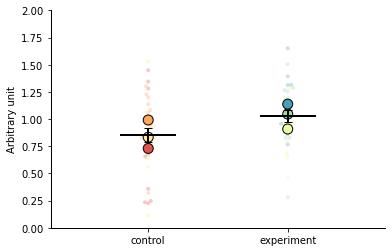

In [98]:
data_exp = generate_data(true_value=0.8, inter_cluster_SD=0.15, intra_cluster_SD=0.3, \
                             N_clusters=3, N_per_cluster=10)
data_control = generate_data(true_value=1, inter_cluster_SD=0.15, intra_cluster_SD=0.3, \
                             N_clusters=3, N_per_cluster=10)
analyze(data_exp, data_control)



And set the values of 'drug' and 'control' identical:

Mean experimetal =  0.987
Mean control =  0.877
inter cluster SD = 0.113
intra cluster SD = 0.201


p value adjusted =  0.472


If your mean and SD are true: 
Probability of false negative error is 0.879


If your SD are true and 
 mean_exp = mean_control = (mean_exp+ mean_control)/2 =  0.932
Probability of false positive error is 0.034


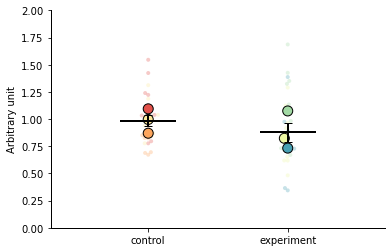

In [99]:
data_exp = generate_data(true_value=1, inter_cluster_SD=0.15, intra_cluster_SD=0.3, \
                             N_clusters=3, N_per_cluster=10)
data_control = generate_data(true_value=1, inter_cluster_SD=0.15, intra_cluster_SD=0.3, \
                             N_clusters=3, N_per_cluster=10)
analyze(data_exp, data_control)

Mean experimetal =  0.955
Mean control =  0.989
inter cluster SD = 0.162
intra cluster SD = 0.317


p value adjusted =  0.737


If your mean and SD are true: 
Probability of false negative error is 0.936


If your SD are true and 
 mean_exp = mean_control = (mean_exp+ mean_control)/2 =  0.972
Probability of false positive error is 0.045


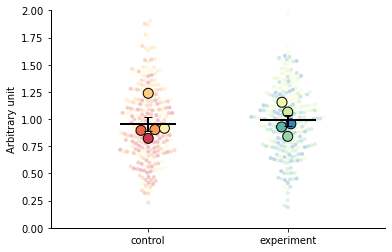

In [101]:
data_exp = generate_data(true_value=1, inter_cluster_SD=0.15, intra_cluster_SD=0.3, \
                             N_clusters=5, N_per_cluster=50)
data_control = generate_data(true_value=1, inter_cluster_SD=0.15, intra_cluster_SD=0.3, \
                             N_clusters=5, N_per_cluster=50)
analyze(data_exp, data_control)

## 2. Show a dependence of error probability on ICC



For now we have seen different experiments. But how does the variation of values affect the error probability? There are also several types of data processing (read methods). Which one is better?

Here we investigate the false positive result and vary inter_cluster_SD and hence ICC (see methods).

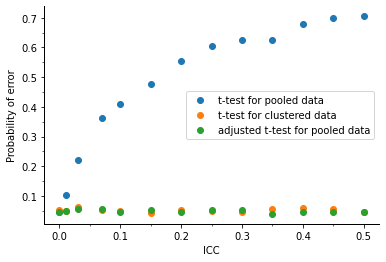

In [89]:
ICC = np.array([0.0, 0.01, 0.03, 0.07, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, \
0.4, 0.45, 0.5])

probability = np.zeros((3, len(ICC)))
probability[0,:] = error_probability_ICC(NN=1000, true_exp_value=1, \
                                    true_control_value=1, \
                                    intra_cluster_SD=0.3, N_clusters=30, \
                                    N_per_cluster=50, ICC=ICC, data_method='pool', \
                                    ttest_method='simple')
probability[1,:] = error_probability_ICC(NN=1000, true_exp_value=1, \
                                        true_control_value=1,  \
                                        intra_cluster_SD=0.3, N_clusters=30, \
                                        N_per_cluster=50, ICC=ICC, data_method='cluster', \
                                        ttest_method='simple')
probability[2,:] = error_probability_ICC(NN=1000, true_exp_value=1, \
                                        true_control_value=1, \
                                        intra_cluster_SD=0.3, N_clusters=30, \
                                        N_per_cluster=50, ICC=ICC, data_method='pool', \
                                        ttest_method='adjusted')
label = ['t-test for pooled data', 't-test for clustered data', 'adjusted t-test for pooled data']
display_graph(probability, ICC, label)

This figure shows us that the use t-test for all your pooled data can lead to false negative result. However one can save the situation by applying t-test for daily means of measurements or using adjusted t-test for pooled data.

## Show heatmap of error plobability in dependence of the number of clusters and measurements per cluster



Let's now think about the number of days and measurements per day. Which parameter should an experimentator increase in order to achieve a reliable result? Should one even bother increasing the number of complex experiments? To answer these questions we will vary the number of days and measurements per day and calculate the probability of error. For this NN=1000 experiments (the ones in the first figure) are carried out.

### **False positive error**

***Processing method: t-test for pooled data:***

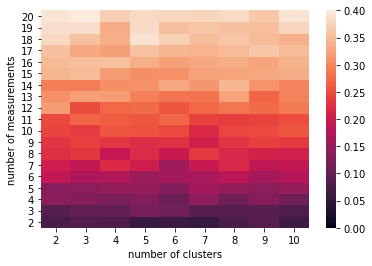

In [41]:
probability = error_probability_heatmap(MAX_N_clusters=10, MAX_N_per_cluster=20, \
                                        NN=1000, true_exp_value=1, true_control_value=1,\
                                        inter_cluster_SD=0.15, intra_cluster_SD=0.3, data_method='pool', \
                                        ttest_method='simple')
display_heatmap(probability, MAX_N_clusters=10, MAX_N_per_cluster=20, scaleMax=0.4)

***Processing method: t-test for cluster means:***

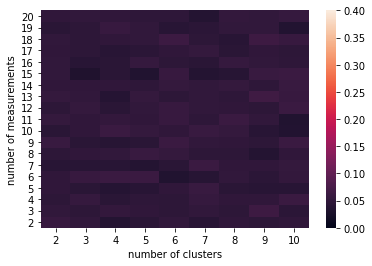

In [27]:
probability = error_probability_heatmap(MAX_N_clusters=10, MAX_N_per_cluster=20, \
                                        NN=1000, true_exp_value=1, true_control_value=1,\
                                        inter_cluster_SD=0.15, intra_cluster_SD=0.3, data_method='cluster', \
                                        ttest_method='simple')
display_heatmap(probability, MAX_N_clusters=10, MAX_N_per_cluster=20, scaleMax=0.4)

***Processing method: adjusted t-test for pooled data:***

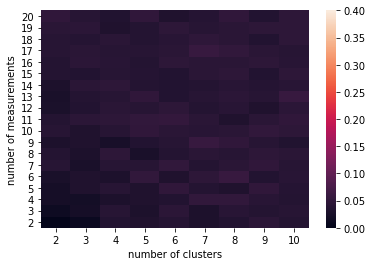

In [28]:
probability = error_probability_heatmap(MAX_N_clusters=10, MAX_N_per_cluster=20, \
                                        NN=1000, true_exp_value=1, true_control_value=1,\
                                        inter_cluster_SD=0.15, intra_cluster_SD=0.3, data_method='pool', \
                                        ttest_method='adjusted')
display_heatmap(probability, MAX_N_clusters=10, MAX_N_per_cluster=20, scaleMax=0.4)

### **False negative error**

***Processing method: t-test for pooled data:***

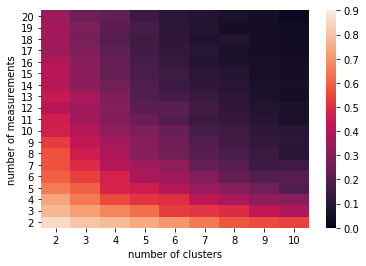

In [29]:
probability = error_probability_heatmap(MAX_N_clusters=10, MAX_N_per_cluster=20, \
                                        NN=1000, true_exp_value=0.8, true_control_value=1,\
                                        inter_cluster_SD=0.15, intra_cluster_SD=0.3, data_method='pool', \
                                        ttest_method='simple')
display_heatmap(probability, MAX_N_clusters=10, MAX_N_per_cluster=20, scaleMax=0.9)

***Processing method: t-test for cluster means:***

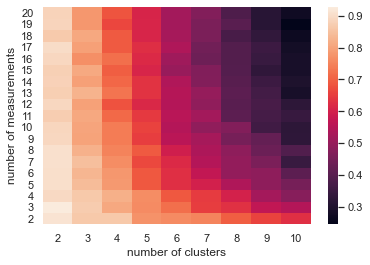

In [157]:
probability = error_probability_heatmap(MAX_N_clusters=10, MAX_N_per_cluster=20, \
                                        NN=1000, true_exp_value=0.8, true_control_value=1,\
                                        inter_cluster_SD=0.15, intra_cluster_SD=0.3, data_method='cluster', \
                                        ttest_method='simple')
display_heatmap(probability, MAX_N_clusters=10, MAX_N_per_cluster=20)

***Processing method: adjusted t-test for pooled data:***

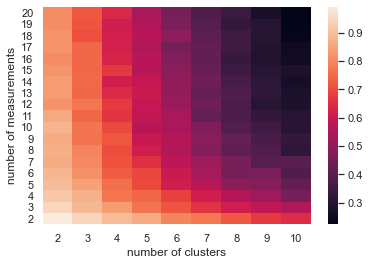

In [158]:
probability = error_probability_heatmap(MAX_N_clusters=10, MAX_N_per_cluster=20, \
                                        NN=1000, true_exp_value=0.8, true_control_value=1,\
                                        inter_cluster_SD=0.15, intra_cluster_SD=0.3, data_method='pool', \
                                        ttest_method='adjusted')
display_heatmap(probability, MAX_N_clusters=10, MAX_N_per_cluster=20, scaleMax)

These heatmaps show that not in every situation the increase of experiments can help